![image](headerBI.png)

# Proyecto 1 

Integrantes:
- Federico Melo Barrero, 202021525, f.melo. Sección 1.
- Shadith Pérez Rivera, 202014687, s.perezr. Sección 2.

## Enfoque Analítico

## Instalación e importación de librerías.

In [1]:
# Instalación de librerias
import pandas as pd
import ydata_profiling as pp
import numpy as np
import sys
import nltk
import random
from num2words import num2words
from collections import Counter

import re, string, unicodedata
import inflect
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from langdetect import detect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import SnowballStemmer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.base import BaseEstimator, ClassifierMixin

#redNeuronal
import gensim
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# model = gensim.models.KeyedVectors.load_word2vec_format('/work/wiki.es.vec', binary=False)
from keras.utils import to_categorical
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

2023-10-16 00:25:30.111555: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 00:25:30.708709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-16 00:25:30.708746: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-16 00:25:30.877050: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-16 00:25:35.602535: W tensorflow/stream_executor/platform/de

True

## 1. Carga de los datos

In [2]:
# Uso de la libreria pandas para la lectura de archivos
dataO = pd.read_excel('cat_6716.xls')

## 2. Entendimiento de los datos

El proposito es obtener información general sobre el conjunto de datos para comprender su estructura y características. Para empezar crearemos una copia de los datos para no modificar el orginal. 

In [3]:
data = dataO.copy()

In [4]:
rows, cols = data.shape
print(f"Se parte de un dataset con {rows} filas y {cols} columnas")

Se parte de un dataset con 3000 filas y 2 columnas


In [5]:
print("Se visualiza una muestra de los datos: ")
data.sample(5)

Se visualiza una muestra de los datos: 


,Textos_espanol,sdg
1349,Esto aísla a los productores de energía renova...,7
1945,"En Brasil, por ejemplo, se pide a los inversor...",7
1421,"De acuerdo con los compromisos del G20, Aleman...",7
1015,Se tiende a creer que la electrificación rural...,7
2932,Cuando comenzó la investigación preliminar par...,16


### 2.1 Perfilamiento de los datos

In [6]:
rows, cols = data.shape
print(f"Se parte de un dataset con {rows} filas y {cols} columnas")

Se parte de un dataset con 3000 filas y 2 columnas


In [7]:
print("Se visualiza una muestra de los datos: ")
data.sample(5)

Se visualiza una muestra de los datos: 


,Textos_espanol,sdg
589,La segunda sección examina las reformas basada...,6
871,"Sin embargo, esta condición podría no ser sufi...",6
1421,"De acuerdo con los compromisos del G20, Aleman...",7
2433,La masacre de Anders Behring Breivik de 77 per...,16
702,"Los estudios, planes y recomendaciones desarro...",6


In [8]:
print("A continuación, se identifican los tipos de datos de cada columna, al igual que las filas vacías: ")
data.info()

A continuación, se identifican los tipos de datos de cada columna, al igual que las filas vacías: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  3000 non-null   object
 1   sdg             3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [9]:

numeric_cols_count: int = len(data.select_dtypes(include=['int64', 'float64']).columns)
categorical_cols_count: int = len(data.select_dtypes(include=['object']).columns)

print(f"El dataset contiene {numeric_cols_count} variables numéricas y {categorical_cols_count} variables categóricas")

El dataset contiene 1 variables numéricas y 1 variables categóricas


Para comprender mejor cada dato, que representa una descripción de alguna problemática relacionada con los ODS de la ONU en algún entorno particular, se añaden columnas con:

- El número de palabras del texto.

- La palabra más frecuente en el texto.

- El palabra con mayor longitud del texto.

- La palabra con menor longitud que se encuentra en el texto.

In [10]:
textos = data.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [Counter(x.split(" ")).most_common(1)[0][0] for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
pp.ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

En el reporte generado por ydata profiling se evidencia lo siguiente sobre el conjunto de registros:

- Todos los registros son distintos, de forma que cada dato es único.

- No hay datos faltantes (e.g. un texto sin clasificación).

- Hay exactamente tres categorías: 6, 7 y 16, ningún texto está categorizado con algo diferente.

- Las categorías están distribuidas de manera uniforme, hay exactamente 1000 datos de cada categoría.

- Los textos tienen en promedio 770 caracteres, el que menos tiene cuenta con 143 y el que más cuenta con 1616

- La gran mayoría de los textos tienen la palabra "de" como la más común. En casi todos los textos, la palabra más común es una palabra de parada.

- El promedio de tamaño para la palabra más larga de cada texto es de 16 caracteres, siendo la menor de 10 y la mayor de 109 caracteres (probablemente por una falta de espacio por un error).

- El promedio de tamaño para la palabra más corta de cada texto es de 1 caracter, probablemente la palabra "y" (que es una palabra de parada). 

Por último, se evidencia una leve correlación entre el número de caracteres de una descripción y la clasificación de la descripción en uno de los 3 posibles ODS: 6, 7 o 16. Esta correlación es menor al 50% y por ende no debería afectar en gran medida el modelo.

### 2.2 Análisis y calidad de los datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.

### 2.2.1 Unicidad 

Se contempla que cada registro sea único, que no existan duplicados, para así garantizar que cada dato tiene el mismo peso en el entrenamiento del modelo.

Como mencionado anteriormente, en el análisis de datos no se encontró ningún dato duplicado, por lo cual no hay necesidad de eliminar ningún registro.

In [11]:
data.duplicated().sum()

0

### 2.2.2 Completitud

Se revisa la completitud de los datos en cada una de las columnas, para cerciorarse de que cada texto corresponde a una clasificación como O y que cada clasificación está asociada a una descripción.

Se encontró que efectivamente los datos están completos, no hay ninguna fila con alguna entrada faltante, todos los textos cuentan con una clasificación y no no hay ninguna clasificación a la cual no le corresponda un texto.

In [12]:
completitud = data.count() / len(data) * 100
print(completitud)

Textos_espanol    100.0
sdg               100.0
dtype: float64


### 2.2.4 Validez

Se contempla que todos los registros sean válidos, es decir, en este caso, que cada una de las descripciones efectivamente sea un dato de texto con un mínimo de caracteres y que cada una de las clasificaciones efectivamente sea un número en el conjunto {6, 7, 16}.

In [13]:
validez_texto = data["Textos_espanol"].apply(lambda x: isinstance(x, str) and len(x) >= 10)
porcentaje_invalidos = (1 - validez_texto.mean()) * 100
print(f"El {porcentaje_invalidos:.2f}% de los datos de texto no son válidos")

El 0.00% de los datos de texto no son válidos


In [14]:
validez_categorias = data["sdg"].apply(lambda x: x in [6, 7, 16])
porcentaje_invalidos = (1 - validez_categorias.mean()) * 100
print(f"El {porcentaje_invalidos:.2f}% de las clasificaciones no son válidas")

El 0.00% de las clasificaciones no son válidas


Podría considerarse que las palabras en otros idiomas son un factor a contemplar al evaluar la validez. Esto se contempla más adelante, donde se identifica que hay un 1.3% de los términos en otros idiomas y se toma la decisión de eliminarlos debido a que son pocos y no se quiere introducir errores haciendo una traducción.

### 2.2.3 Consistencia

Por último, después de los anterior, se evidencia que los datos son consistentes al haber consistencia estructural (pues los esos datos de texto están almacenados como cadenas de caracteres y las clasificaciones, que son datos numéricos, están almacenadas bajo tipos numéricos), semántica (los datos que representan el mismo concepto tienen la misma reprresentación, por ejemplo no hay dos clasificaciones "6" y "seis", únicamente hay 6) y de contenido (pues los textos no se contradicen directamente entre sí).

## 3. Limpieza y preparacion de los datos

Se crea una lista con los nombres de las columnas

In [15]:
column_names = data.columns.tolist()
print(column_names)


['Textos_espanol', 'sdg']


In [16]:
# Creamos una nueva columna para almacenar el idioma detectado
data['idioma'] = data['Textos_espanol'].apply(detect)

# Calculamos la proporción de cada idioma
idiomas = data['idioma'].value_counts(normalize=True)
print(idiomas)


es    0.999
en    0.001
Name: idioma, dtype: float64


Se identificó que la gran mayoría del texto está en español, con únicamente un 0.1% de los datos en otro idioma, en concreto inglés. A causa de eso, se toma la decisión de eliminar las palabras en el idioma foráneo.

Esto se realiza porque no se quiere introducir un factor de propagación del error mediante una traducción de las palabras que están en idioma foráneo. Teniendo en cuenta que dichas palabras son un porcentaje muy reducido del total de registros, no se pierde una cantidad significativa de información al realizar la eliminación.

In [17]:
#eliminar los que estan en ingles
data = data[data['idioma'] != 'en']

In [18]:
#Ver si esta balanceado
clase_counts = data['sdg'].value_counts()
print(clase_counts)
X_para_csv = data["Textos_espanol"]
sdg_originales = data["sdg"]


6     1000
16    1000
7      997
Name: sdg, dtype: int64


Tras la remoción de las palabras en el idioma foráneo, se evidencia que se genera un leve desbalance en el número de registros que pertenecen a cada categoría. Sin embargo dicho balance es inferior al 1% y por ende no debería afectar notablemente al modelo.

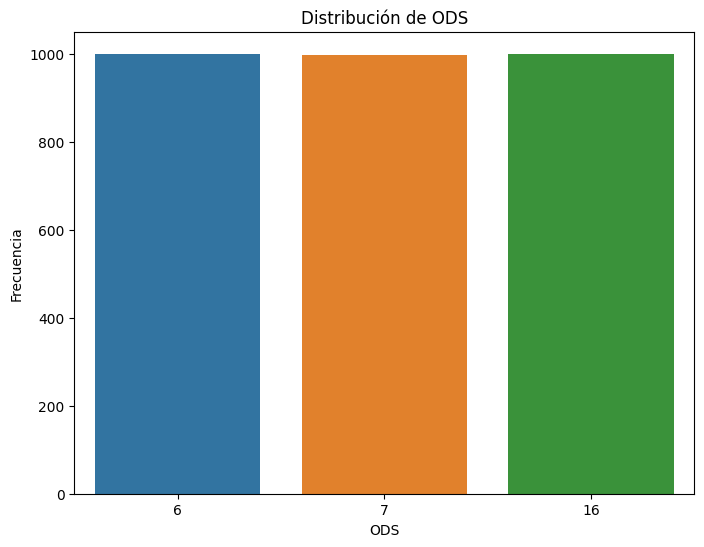

In [19]:
# Calcular las frecuencias de las clases
clase_counts = data['sdg'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=clase_counts.index, y=clase_counts.values)

# Personalizar el gráfico
plt.title('Distribución de ODS')
plt.xlabel('ODS')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Se evidencia en la gráfica que el desbalance del modelo es casi imperceptible.

## Preprocesamiento final

A continuación se finaliza el preprocesamiento. Esta etapa consistió de remover los caracteres que no hacen parte de la codificación ASCII, remover todos los que no son alfabéticos, convertir todos los caracteres de mayúscula a minúscula, reemplazar los caracteres numéricos por su equivalente en palabras (“2” pasa a “dos”) y remover las palabras de parada (que en español suelen ser artículos, preposiciones, conjunciones, determinantes, entre otros).

In [20]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang='es')
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    stop_words = set(stopwords.words('spanish'))
    new_words = [word for word in words if word not in stop_words]
    return new_words

def preprocessing(text):
    words = text.split()  # Tokeniza el texto en palabras
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return ' '.join(words)  # Une las palabras procesadas en un texto

data['Textos_espanol'] = data['Textos_espanol'].apply(preprocessing)

Se muestra la comparación entre el texto original y el preprocesado.

In [21]:
# muestra aleatoria de ejemplos
sample_indices = random.sample(range(len(data)), 3)  
sample_data = dataO.iloc[sample_indices]

#función de preprocesamiento a los ejemplos seleccionados
sample_data['Textos_preprocesados'] = sample_data['Textos_espanol'].apply(preprocessing)

#ejemplos antes y después del preprocesamiento
for index, row in sample_data.iterrows():
    print("Original:")
    print(row['Textos_espanol'])
    print("\nPreprocesado:")
    print(row['Textos_preprocesados'])
    print("\n---------------------------------\n")

Original:
Sin embargo, aprovechar estas oportunidades al alcance de la mano ha exacerbado la división urbano-rural con respecto al acceso a la electricidad. En todas las regiones en desarrollo, las tasas de electrificación son significativamente más bajas en las áreas rurales. En el África subsahariana, por ejemplo, mientras que el 58,3 % de las personas que viven en las ciudades tienen acceso a la electricidad, solo el 8 % de las que viven en zonas rurales tienen un acceso similar (cuadro 1). Uno de los programas de electrificación exitosos más citados es el de China, que ha alcanzado una tasa de más del 98 por ciento en menos de dos décadas (1985-2000).

Preprocesado:
embargo aprovechar oportunidades alcance mano exacerbado division urbanorural respecto acceso electricidad todas regiones desarrollo tasas electrificacion significativamente mas bajas areas rurales africa subsahariana ejemplo mientras 583 personas viven ciudades acceso electricidad solo ocho viven zonas rurales acceso s

## Tokenización

Se realiza una tokenización con granularidad de palabras en la que distintas palabras se identifican por un mismo término, dividiendo el texto para aplicar los modelos. Se utiliza como separador el espacio.

In [22]:
# Tokeniza los textos y aplicar el preprocesamiento
data['words'] = data['Textos_espanol'].apply(word_tokenize)

for i in range(1):
    original_text = data['Textos_espanol'][i]
    tokenized_text = word_tokenize(original_text)
    preprocessed_text = preprocessing(original_text)
    
print("Texto:")
print(original_text)
print("\nTexto tokenizado:")
print(tokenized_text)

Texto:
importante destacar ano sequia espera disminuyan aportes aumente demanda agua cultivos vegetacion provocara reduccion caudal rios estan conectados hidrologicamente acuifero asi menor disponibilidad agua ecosistemas dependientes aguas subterraneas externalidades espaciales pueden incluir agotamiento cursos agua descenso nivel freatico local ejemplo bombeo continuo pozo b provocara agotamiento cursos agua reduccion caudal

Texto tokenizado:
['importante', 'destacar', 'ano', 'sequia', 'espera', 'disminuyan', 'aportes', 'aumente', 'demanda', 'agua', 'cultivos', 'vegetacion', 'provocara', 'reduccion', 'caudal', 'rios', 'estan', 'conectados', 'hidrologicamente', 'acuifero', 'asi', 'menor', 'disponibilidad', 'agua', 'ecosistemas', 'dependientes', 'aguas', 'subterraneas', 'externalidades', 'espaciales', 'pueden', 'incluir', 'agotamiento', 'cursos', 'agua', 'descenso', 'nivel', 'freatico', 'local', 'ejemplo', 'bombeo', 'continuo', 'pozo', 'b', 'provocara', 'agotamiento', 'cursos', 'agua'

## Normalización

Se realiza la normalización de las palabras haciendo uso de stemming y de lematización, independientemente.

Para stemming, se utiliza SnowBall Stemming debido a que cuida no reducir al mismo término las palabras con significados diferentes y evita realizar stemming en casos complicados (recordando que en cuestión de stemming es peor hacer un stemming excesivo que hacer menos). No siempre reduce los términos a una palabra existente, pero eso no representa una dificultad en este contexto de negocio.

In [23]:
data1 = data.copy()

stemmer = SnowballStemmer('spanish')

def stem_words(words):
    return [stemmer.stem(word) for word in words]

def stem_text(text):
    return " ".join([stemmer.stem(word) for word in text.split(" ")])

data1['tokens'] = data1['words'].apply(stem_words)

#muestra aleatoria de ejemplos
sample_indices = random.sample(range(len(data1)), 5)
sample_data = data.iloc[sample_indices]

#función de stemming a los ejemplos seleccionados
sample_data['stemmed_tokens'] = sample_data['words'].apply(stem_words)

#ejemplos antes y después del stemming
for index, row in sample_data.iterrows():
    print("Original:")
    print(row['words'])
    print("\nDespués del stemming:")
    print(row['stemmed_tokens'])
    print("\n---------------------------------\n")

Original:
['ademas', 'red', 'distribucion', 'mantiene', 'alrededor', '271', 'ciento', 'infraestructura', 'suministro', 'agua', 'funciona', 'requiere', 'reconstruccion', 'completa', 'mas', 'sesenta', 'ciento', 'infraestructura', 'abastecimiento', 'agua', 'necesita', 'mantenimiento', 'debido', 'operacion', 'continua', 'mas', 'veinte', 'treinta', 'anos', 'sujeta', 'mantenimiento', 'debido', 'costos', 'excesivos', 'implica']

Después del stemming:
['adem', 'red', 'distribucion', 'mantien', 'alrededor', '271', 'cient', 'infraestructur', 'suministr', 'agu', 'funcion', 'requier', 'reconstruccion', 'complet', 'mas', 'sesent', 'cient', 'infraestructur', 'abastec', 'agu', 'necesit', 'manten', 'deb', 'operacion', 'continu', 'mas', 'veint', 'treint', 'anos', 'sujet', 'manten', 'deb', 'cost', 'exces', 'implic']

---------------------------------

Original:
['pueden', 'ser', 'significativos', 'especialmente', 'si', 'deben', 'conectar', 'recursos', 'distantes', 'puede', 'ser', 'caso', 'energia', 'eol

También se prueba haciendo uso de lematización con WordNetLemmatizer:

In [24]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split(" ")])

data['tokens'] = data['words'].apply(lemmatize_words)

# Muestra aleatoria de ejemplos
sample_indices = random.sample(range(len(data)), 5)
sample_data = data.iloc[sample_indices]

# Función de lematización a los ejemplos seleccionados
sample_data['lemmatized_tokens'] = sample_data['words'].apply(lemmatize_words)

# Ejemplos antes y después de la lematización
for index, row in sample_data.iterrows():
    print("Original:")
    print(row['words'])
    print("\nDespués de la lematización:")
    print(row['lemmatized_tokens'])
    print("\n---------------------------------\n")

Original:
['pastoreo', 'excesivo', 'agricultura', 'factores', 'presion', 'adicionales', 'hace', 'existia', 'plan', 'manejo', 'ninguna', 'cooperacion', 'transfronteriza', 'humedal', 'embargo', 'cierta', 'cooperacion', 'bilateral', 'determinacion', 'frontera', 'largo', 'laguna', 'republica', 'islamica', 'iran', 'union', 'sovietica', 'asi', 'republica', 'islamica', 'iran', 'turkmenistan', 'varios', 'embalses', 'presas', 'kura', 'tambien', 'ayudan', 'regulacion', 'inundaciones']

Después de la lematización:
['pastoreo', 'excesivo', 'agricultura', 'factores', 'presion', 'adicionales', 'hace', 'existia', 'plan', 'manejo', 'ninguna', 'cooperacion', 'transfronteriza', 'humedal', 'embargo', 'cierta', 'cooperacion', 'bilateral', 'determinacion', 'frontera', 'largo', 'laguna', 'republica', 'islamica', 'iran', 'union', 'sovietica', 'asi', 'republica', 'islamica', 'iran', 'turkmenistan', 'varios', 'embalses', 'presas', 'kura', 'tambien', 'ayudan', 'regulacion', 'inundaciones']

--------------------

In [25]:
data.sample(5)

,Textos_espanol,sdg,idioma,words,tokens
106,instalaciones prueba empezaron dos mil doce pa...,6,es,"[instalaciones, prueba, empezaron, dos, mil, d...","[instalaciones, prueba, empezaron, do, mil, do..."
2837,articulo coautoria capitulo treinta y cinco ox...,16,es,"[articulo, coautoria, capitulo, treinta, y, ci...","[articulo, coautoria, capitulo, treinta, y, ci..."
1666,periodo dos mil diez dos mil veinticinco corre...,7,es,"[periodo, dos, mil, diez, dos, mil, veinticinc...","[periodo, do, mil, diez, do, mil, veinticinco,..."
2174,artaculo sostiene respecta hungraa polonia uso...,16,es,"[artaculo, sostiene, respecta, hungraa, poloni...","[artaculo, sostiene, respecta, hungraa, poloni..."
2297,resumenlos regimenes autoritarios electorales ...,16,es,"[resumenlos, regimenes, autoritarios, electora...","[resumenlos, regimenes, autoritarios, electora..."


Tras ejecutar el notebook tanto con stemming como con lematización, se elige utilizar stemming debido a que se obtuvieron mejores resultados con stemming tras ejecutar el notebook con cada uno (lematización arrojaba precisiones del 97%, mientras que con stemming se obtuvo 98.5% el mejor modelo). Sumado a eso, como se menciona en el documento, investigaciones han demostrado que en idiomas como el español, suele resultar más efectivo el uso de stemming en lugar del uso de lematización.

In [26]:
data['Textos_espanol'] = [stem_text(texto) for texto in data['Textos_espanol']]

# Modelos

## Red Neuronal

La justificación para utilizar una red neuronal se encuentra en detalle en el documento.

Se separan los datos en 80% datos de entrenamiento para generar el modelo y 20% datos de prueba para evaluar qué tan bien generaliza este.

In [27]:
X = data['Textos_espanol']
y = data['sdg']  
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train,X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Se realiza la generación de vectores usando el modelo tf-idf.

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

tfidf_vectorizer = TfidfVectorizer()  # Limita el número de características si es necesario
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()
X_val_tfidf = tfidf_vectorizer.transform(X_val).toarray()


X_train_tfidf = np.array(X_train_tfidf, dtype=np.float32)
X_test_tfidf= np.array(X_test_tfidf, dtype=np.float32)
X_val_tfidf= np.array(X_val_tfidf, dtype=np.float32)

Se realiza el entrenamiento del modelo

In [29]:
X_train_tfidf[2]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [30]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # num_classes es el número de categorías

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-10-16 00:29:31.049410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-16 00:29:31.049463: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-16 00:29:31.049494: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-54529ab6-cd7d-40b9-9312-e83cf4ce27d0): /proc/driver/nvidia/version does not exist
2023-10-16 00:29:31.053323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
from keras.utils import to_categorical
from tensorflow import keras

label_mapping = {6: 0, 7: 1, 16: 2}

# Mapear las etiquetas originales a índices
y_train = [label_mapping[label] for label in y_train]
y_test = [label_mapping[label] for label in y_test]
y_val = [label_mapping[label] for label in y_val]

# # Convierte las etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, num_classes=3)  # 3 categorías en este ejemplo
y_test = to_categorical(y_test, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)


A continuación se almacena el mejor modelo en el archivo best_model.h5

In [32]:
my_callback = [
    keras.callbacks.EarlyStopping(patience = 5), # Dejar de entrenar si no mejora
    keras.callbacks.ModelCheckpoint(filepath = 'best_model.h5', save_best_only = True), # Guardar el mejor modelo
    keras.callbacks.TensorBoard(log_dir = 'my_log_dir', histogram_freq = 1) # Guardar los logs para tensorboard
]

model.fit(X_train_tfidf, y_train, epochs=20, batch_size=128, validation_data=(X_val_tfidf, y_val), callbacks=my_callback)


Epoch 1/20
15/15 [==============================] - 4s 161ms/step - loss: 1.0640 - accuracy: 0.7220 - val_loss: 1.0010 - val_accuracy: 0.9625
Epoch 2/20
15/15 [==============================] - 2s 104ms/step - loss: 0.9238 - accuracy: 0.9598 - val_loss: 0.8502 - val_accuracy: 0.9604
Epoch 3/20
15/15 [==============================] - 1s 90ms/step - loss: 0.7575 - accuracy: 0.9739 - val_loss: 0.6972 - val_accuracy: 0.9708
Epoch 4/20
15/15 [==============================] - 1s 89ms/step - loss: 0.5955 - accuracy: 0.9812 - val_loss: 0.5583 - val_accuracy: 0.9750
Epoch 5/20
15/15 [==============================] - 1s 103ms/step - loss: 0.4603 - accuracy: 0.9823 - val_loss: 0.4430 - val_accuracy: 0.9771
Epoch 6/20
15/15 [==============================] - 2s 108ms/step - loss: 0.3502 - accuracy: 0.9885 - val_loss: 0.3553 - val_accuracy: 0.9771
Epoch 7/20
15/15 [==============================] - 1s 97ms/step - loss: 0.2748 - accuracy: 0.9906 - val_loss: 0.2908 - val_accuracy: 0.9792
Epoch 8/2

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                630528    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 630,723
Trainable params: 630,723
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow.keras.models import load_model

# Load the model from a file
model = load_model('/work/best_model.h5')

# You can now use the loaded model for predictions or further training

y_pred_prob= model.predict(X_test_tfidf)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(y_test, axis=1)

19/19 [==============================] - 1s 20ms/step


Con esto, se completa la realización de la red neuronal, que puede se cargada para su uso en predicciones o para entrenarla más a fondo, posiblemente con nuevos datos anotados que el negocio haga disponibles.

### Evaluación de la red neuronal

 Una vez completada la red neuronal, se realiza el proceso de evaluación para determinar en qué medida esa generaliza de forma adecuada y es por lo tanto útil en un uso de la vida real.

Se utilizan las siguientes medidas de evaluación cuatitativa para evaluar la efectividad del modelo:

- Precisión (accuracy), que calcula el porcentaje de registros clasificados correctamente.

- Macro precisión o precisión por clase, que realiza un promedio de la precisión que tiene el modelo para cada clasificación. 

- Recall o sensibilidad, que mide la tasa de “verdaderos positivos” clasificados correctamente.

- Puntaje F1, que es el promedio ponderado de la precisión y la sensibilidad.

Estos indicadores se explican más a fondo en el documento.

In [35]:
# Calcular la precisión
accuracy_neural = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_neural:.3f}')

# Calcular la precisión por clase
precision_neural = precision_score(y_test, y_pred, average='macro')  # 'macro' calcula la precisión promedio
print(f'Precisión (Macro): {precision_neural:.3f}')

# Calcular la recuperación (recall) por clase
recall_neural = recall_score(y_test, y_pred, average='macro')  # 'macro' calcula la recuperación promedio
print(f'Recuperación (Macro): {recall_neural:.3f}')

# Calcular la puntuación F1 por clase
f1_neural = f1_score(y_test, y_pred, average='macro')  # 'macro' calcula la puntuación F1 promedio
print(f'Puntuación F1 (Macro): {f1_neural:.3f}')

# Calcular la matriz de confusión
conf_matrix_neural = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix_neural)

# Imprimir el informe de clasificación
class_report_neural = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(class_report_neural)

Accuracy: 0.982
Precisión (Macro): 0.982
Recuperación (Macro): 0.982
Puntuación F1 (Macro): 0.982
Matriz de Confusión:
[[207   5   1]
 [  4 195   1]
 [  0   0 187]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       213
           1       0.97      0.97      0.97       200
           2       0.99      1.00      0.99       187

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



Se muestra la matriz de confusión:

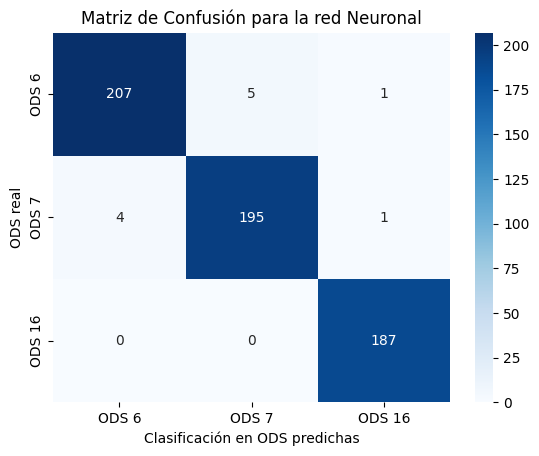

In [36]:
sns.heatmap(conf_matrix_neural, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ODS 6', 'ODS 7', 'ODS 16'],
            yticklabels=['ODS 6', 'ODS 7', 'ODS 16'])

plt.xlabel('Clasificación en ODS predichas')
plt.ylabel('ODS real')
plt.title('Matriz de Confusión para la red Neuronal')

plt.show()

Adicionalmente, se muestra una gráfica en la que se comparan los valores obtenidos para cada uno de los indicadores de evaluación del modelo:

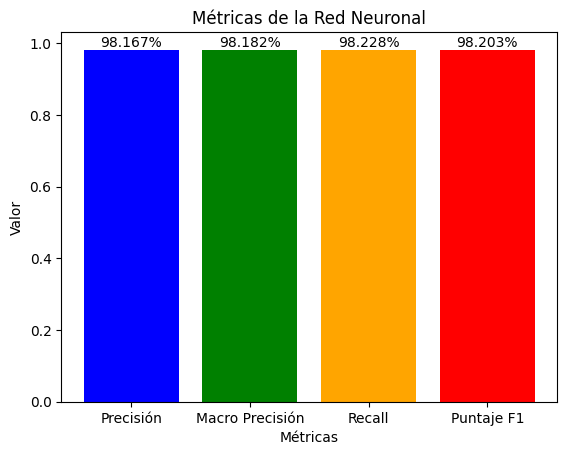

In [37]:
metric_names = ['Precisión', 'Macro Precisión', 'Recall', 'Puntaje F1']
metric_values = [accuracy_neural, precision_neural, recall_neural, f1_neural]

bars = plt.bar(metric_names, metric_values, color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas de la Red Neuronal')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval*100:.3f}%", ha='center', va='bottom')

plt.show()

## TF-IDF

Nuevamente, se crea una representación de vectores usando tf-idf. Esta se usará para los próximos dos modelos.

In [38]:
# Crear un objeto TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Aplicar TF-IDF a los tokens
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Textos_espanol'])

# Obtener la representación TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenar el DataFrame de TF-IDF con tu DataFrame original
data = pd.concat([data, tfidf_df], axis=1)

# Mostrar las primeras filas del DataFrame resultante
data.head()

,Textos_espanol,sdg,idioma,words,tokens,00000002,00000004,00015,001,002,...,zimbabuens,zinc,zn,zon,zonificacia3n,zonificacion,zout30,zre,zuo,zusammenarbeit
0,import destac ano sequi esper disminu aport au...,6.0,es,"[importante, destacar, ano, sequia, espera, di...","[importante, destacar, ano, sequia, espera, di...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,gran cantid literatur australi are sugier fuer...,6.0,es,"[gran, cantidad, literatura, australia, area, ...","[gran, cantidad, literatura, australia, area, ...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,proces descentralizacion emprend seri activ re...,6.0,es,"[procesos, descentralizacion, emprendidos, ser...","[procesos, descentralizacion, emprendidos, ser...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,pued ten consecuent sustancial calid agu espec...,6.0,es,"[puede, tener, consecuencias, sustanciales, ca...","[puede, tener, consecuencias, sustanciales, ca...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,funcion benefici tambi incorpor parametr afect...,6.0,es,"[funcion, beneficio, tambien, incorpora, param...","[funcion, beneficio, tambien, incorpora, param...",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Regresión Logística

Se aplica el modelo de regresión logística. La razón de su aplicación se provee en el documento, explicada a fondo.

Se elimina la columna de los datos en donde están las categorías:

In [39]:
data = data.dropna(subset=['sdg'])


Se separan los datos en 80% datos de entrenamiento para generar el modelo y 20% datos de prueba para evaluar qué tan bien generaliza este.

In [40]:
spanish_stop_words = set(stopwords.words('spanish'))

X = data['Textos_espanol']
y = data['sdg']  

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Se genera un pipeline para la aplicación del modelo de regresión logística, que básicamente aplica la generación de vectores siguiendo el modelo tf-idf y luego aplica el algoritmo de regresión logística.

In [41]:
lr_pipeline_tf_idf = Pipeline([
    ('vectorize', TfidfVectorizer(stop_words=spanish_stop_words, lowercase=True)),
    ('model', LogisticRegression())
])

In [42]:
X_train

2212    posterior guerr fri vist aument import argumen...
271     garantiz arregl gobern ayud moviliz financi ag...
2906    capitul examin evolucion haci intervencion hum...
369     utiliz sistem bloqu decrecient cobr extraccion...
2889    siguient introduccion revis lagun existent teo...
                              ...                        
763     envejec infraestructur falt capac gestion gobi...
835     conduj grav problem energet llev kirguist camb...
1655    exist clar compensacion ahorr energi rendimien...
2610    ensay escrit simposi jerusalem review of legal...
2735    consolidacion paz suel vers escenari internaci...
Name: Textos_espanol, Length: 2397, dtype: object

Se realizan las predicciones sobre los datos de prueba haciendo usao del pipeline:

In [43]:
model_name = 'lr_pipeline_tf_idf'

lr_pipeline_tf_idf.fit(X_train, y_train)


# Ahora puedes utilizar lr_pipeline_tf_idf para hacer predicciones en tus datos de prueba
y_pred = lr_pipeline_tf_idf.predict(X_test)

In [44]:
y_pred

array([ 7.,  6.,  7., 16.,  6.,  7.,  6., 16.,  7.,  6., 16., 16.,  7.,
        6.,  6., 16.,  6.,  6., 16., 16.,  7., 16., 16., 16.,  6., 16.,
        6., 16.,  7.,  6.,  6.,  7.,  7.,  7., 16.,  7.,  6.,  6.,  7.,
        7., 16.,  7.,  6.,  6.,  6.,  6.,  6.,  7., 16.,  7.,  6., 16.,
        6., 16.,  6., 16.,  7., 16., 16.,  6., 16.,  7., 16.,  7.,  6.,
        6., 16.,  6.,  7., 16.,  6.,  6.,  7., 16.,  7.,  7.,  7., 16.,
        6., 16., 16.,  6., 16., 16.,  6.,  7.,  6.,  7.,  7., 16.,  7.,
        6.,  7.,  7.,  6., 16.,  6.,  6.,  6.,  6.,  7., 16., 16.,  7.,
        6.,  7.,  7.,  7., 16., 16., 16.,  7.,  7.,  7., 16.,  6., 16.,
       16.,  6., 16.,  6.,  6.,  7.,  7., 16., 16., 16., 16., 16.,  6.,
        6., 16.,  7.,  6.,  6.,  6., 16.,  7.,  7.,  7.,  7.,  6., 16.,
       16.,  7.,  6., 16., 16.,  6.,  7.,  6., 16.,  6.,  6., 16.,  6.,
       16.,  7.,  7., 16., 16.,  6.,  6.,  7.,  6., 16., 16., 16.,  6.,
       16.,  7.,  7.,  7., 16., 16.,  7.,  7.,  7.,  7.,  6.,  7

Similar a como se hizo antes con la red neuronal, se genera ahora la evaluación del modelo. Se utilizan los indicadores ya mencionados:

- Precisión (accuracy), que calcula el porcentaje de registros clasificados correctamente.

- Macro precisión o precisión por clase, que realiza un promedio de la precisión que tiene el modelo para cada clasificación. 

- Recall o sensibilidad, que mide la tasa de “verdaderos positivos” clasificados correctamente.

- Puntaje F1, que es el promedio ponderado de la precisión y la sensibilidad.

Estos indicadores se explican más a fondo en el documento.

In [45]:
 
# Calcular la precisión
accuracy_logistic = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_logistic:.3f}')

# Calcular la precisión por clase
precision_logistic = precision_score(y_test, y_pred, average='macro')  # 'macro' calcula la precisión promedio
print(f'Precisión (Macro): {precision_logistic:.3f}')

# Calcular la recuperación (recall) por clase
recall_logistic = recall_score(y_test, y_pred, average='macro')  # 'macro' calcula la recuperación promedio
print(f'Recuperación (Macro): {recall_logistic:.3f}')

# Calcular la puntuación F1 por clase
f1_logistic = f1_score(y_test, y_pred, average='macro')  # 'macro' calcula la puntuación F1 promedio
print(f'Puntuación F1 (Macro): {f1_logistic:.3f}')

# Calcular la matriz de confusión
conf_matrix_logistic = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix_logistic)

# Imprimir el informe de clasificación
class_report_logistic = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(class_report_logistic)

Accuracy: 0.985
Precisión (Macro): 0.985
Recuperación (Macro): 0.985
Puntuación F1 (Macro): 0.985
Matriz de Confusión:
[[209   2   2]
 [  3 195   2]
 [  0   0 187]]
Informe de Clasificación:
              precision    recall  f1-score   support

         6.0       0.99      0.98      0.98       213
         7.0       0.99      0.97      0.98       200
        16.0       0.98      1.00      0.99       187

    accuracy                           0.98       600
   macro avg       0.98      0.99      0.99       600
weighted avg       0.99      0.98      0.98       600



Se muestra la matriz de confusión:

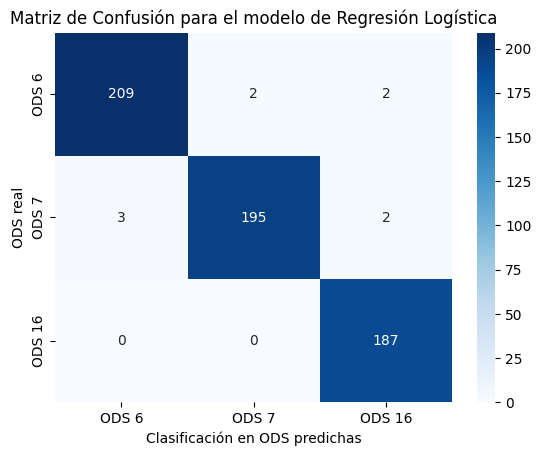

In [46]:
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ODS 6', 'ODS 7', 'ODS 16'],
            yticklabels=['ODS 6', 'ODS 7', 'ODS 16'])

plt.xlabel('Clasificación en ODS predichas')
plt.ylabel('ODS real')
plt.title('Matriz de Confusión para el modelo de Regresión Logística')

plt.show()

Adicionalmente, se muestra una gráfica en la que se comparan los valores obtenidos para cada uno de los indicadores de evaluación del modelo:

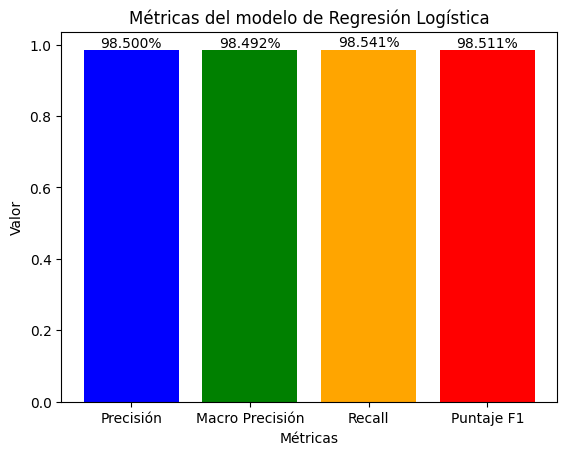

In [47]:
metric_names = ['Precisión', 'Macro Precisión', 'Recall', 'Puntaje F1']
metric_values = [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic]

bars = plt.bar(metric_names, metric_values, color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas del modelo de Regresión Logística')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval*100:.3f}%", ha='center', va='bottom')

plt.show()

## Naive Bayes

Se aplica el modelo de naive bayes. La razón de su aplicación se provee en el documento, explicada a fondo.

In [53]:
# Convertir los textos en una bolsa de palabras (CountVectorizer)
vectorizer = CountVectorizer()
X_bayes = vectorizer.fit_transform(data['Textos_espanol'])
y = data['sdg']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_bayes, y, test_size=0.2, random_state=0)

# Definir el modelo de Naive Bayes (MultinomialNB)
bys = MultinomialNB()

# Definir las particiones para la validación cruzada (por ejemplo, 5 particiones)
particiones = KFold(n_splits=10, shuffle=True, random_state=0)

# Definir los posibles valores de hiperparámetros a probar
param_grid = {'alpha': [0.1] + [x/2 for x in range(1, 21)]} # [0.1, 0.5, 1.0, 1.5, ..., 10.0]

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
bys = GridSearchCV(bys, param_grid, cv=particiones, n_jobs=-1)
bys.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y la precisión del modelo
best_params = bys.best_params_
accuracy = bys.best_score_
print("Best params: ", best_params)
print("Score: ", accuracy)



Best params:  {'alpha': 1.5}
Score:  0.9808106694560669


Habiendo encontrado esos parámetros, se aplica el modelo de naive bayes:

In [49]:
y_pred = bys.predict(X_test)

Al igual que en los dos modelos anteriores, se genera ahora la evaluación del modelo. Se utilizan los indicadores ya mencionados:

- Precisión (accuracy), que calcula el porcentaje de registros clasificados correctamente.

- Macro precisión o precisión por clase, que realiza un promedio de la precisión que tiene el modelo para cada clasificación. 

- Recall o sensibilidad, que mide la tasa de “verdaderos positivos” clasificados correctamente.

- Puntaje F1, que es el promedio ponderado de la precisión y la sensibilidad.

Estos indicadores se explican más a fondo en el documento.

In [50]:
# Calcular la precisión
accuracy_bayes = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_bayes:.3f}')

# Calcular la precisión por clase
precision_bayes = precision_score(y_test, y_pred, average='macro')  # 'macro' calcula la precisión promedio
print(f'Precisión (Macro): {precision_bayes:.3f}')

# Calcular la recuperación (recall) por clase
recall_bayes = recall_score(y_test, y_pred, average='macro')  # 'macro' calcula la recuperación promedio
print(f'Recuperación (Macro): {recall_bayes:.3f}')

# Calcular la puntuación F1 por clase
f1_bayes = f1_score(y_test, y_pred, average='macro')  # 'macro' calcula la puntuación F1 promedio
print(f'Puntuación F1 (Macro): {f1_bayes:.3f}')

# Calcular la matriz de confusión
conf_matrix_bayes = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix_bayes)

# Imprimir el informe de clasificación
class_report_bayes = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(class_report_bayes)

Accuracy: 0.982
Precisión (Macro): 0.982
Recuperación (Macro): 0.982
Puntuación F1 (Macro): 0.982
Matriz de Confusión:
[[208   3   2]
 [  5 195   0]
 [  1   0 186]]
Informe de Clasificación:
              precision    recall  f1-score   support

         6.0       0.97      0.98      0.97       213
         7.0       0.98      0.97      0.98       200
        16.0       0.99      0.99      0.99       187

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



Se muestra la matriz de confusión:

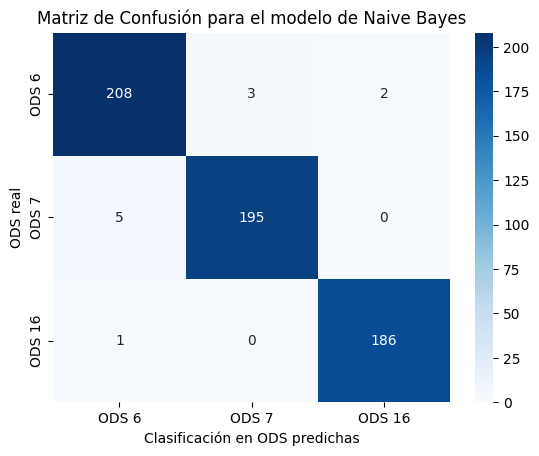

In [51]:
sns.heatmap(conf_matrix_bayes, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ODS 6', 'ODS 7', 'ODS 16'],
            yticklabels=['ODS 6', 'ODS 7', 'ODS 16'])

plt.xlabel('Clasificación en ODS predichas')
plt.ylabel('ODS real')
plt.title('Matriz de Confusión para el modelo de Naive Bayes')

plt.show()

Adicionalmente, se muestra una gráfica en la que se comparan los valores obtenidos para cada uno de los indicadores de evaluación del modelo:

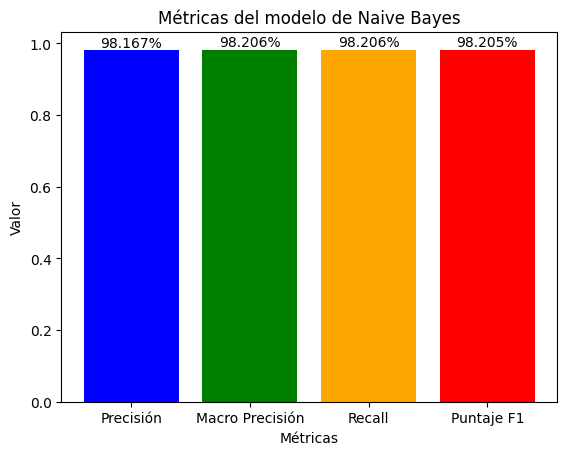

In [52]:
metric_names = ['Precisión', 'Macro Precisión', 'Recall', 'Puntaje F1']
metric_values = [accuracy_bayes, precision_bayes, recall_bayes, f1_bayes]

bars = plt.bar(metric_names, metric_values, color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas del modelo de Naive Bayes')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval*100:.3f}%", ha='center', va='bottom')

plt.show()

Por último, se genera el archivo csv solicitado. Para esto se hace uso del mejor modelo, que fue la regresión logística.

In [60]:
new_data = pd.read_excel('SinEtiquetatest_cat_6716.xls')
new_data.sample(5)

,Textos_espanol,sdg
265,Hay una opinión general de que existen oportun...,NaN
461,Este artículo examina la manera en que el auge...,NaN
83,La Conferencia de Palermo representa un import...,NaN
746,La gestión del agua es un negocio intrínsecame...,NaN
901,"En abril de 2010, el Supremo Tribunal Federal ...",NaN


In [61]:
new_X = [stem_text(texto) for texto in new_data['Textos_espanol']]
sdg = lr_pipeline_tf_idf.predict(new_X)
new_data["sdg"] = sdg
new_data.sample(5)

,Textos_espanol,sdg
474,Este artículo contribuye a la literatura empír...,16.0
511,A la luz de un cambio reciente en el diálogo h...,16.0
922,"Como actores no estatales, las EMSP no están a...",16.0
66,"En particular, las interacciones de las aguas ...",6.0
204,Los objetivos del Centro son crear una base de...,7.0


In [62]:
new_data.to_csv('f1_score.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54529ab6-cd7d-40b9-9312-e83cf4ce27d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>